In [1]:
import pandas as pd

from utils import constant_segmentation, load_parquet_to_df_list, z_normalize, interpolate_segments
from approximation.paa import PAA
from discretization.sax.one_d_sax import OneDSAX, compute_slopes
from discretization.sax.symbol_mapping import IntervalNormMedian, IntervalMean, MeanValuePoints, MedianValuePoints

In [2]:
path = "../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)

# concatenate time series to one dataframe, because all time series have the same length
df_norm = pd.concat([z_normalize(df["signal"].to_frame()) for df in df_list], axis=1).iloc[:, :2]

In [3]:
paa = PAA(window_size=5)
df_paa = paa.transform(df_norm)

In [4]:
one_d_sax = OneDSAX(alphabet_size_avg=8, alphabet_size_slope=8)
df_one_d_sax = one_d_sax.transform(df_paa, df_norm, paa.window_size)

In [5]:
symbol_mapping_avg = IntervalNormMedian(alphabet_size=one_d_sax.alphabet_size_avg)
# var_slope only available after transformation
symbol_mapping_slope = IntervalNormMedian(alphabet_size=one_d_sax.alphabet_size_slope, var=one_d_sax.var_slope)

c:\users\danie\documents\karlsruhe\03_kit_studium\07_semester\bachelorarbeit\bachelorarbeit\repo\implementation\1_code\src\discretization\sax\one_d_sax.py:208: UserWarning: Make sure you have initialized the chosen 'symbol_mapping_slope' strategy with the variance of the Gaussian distribution that was used to determine the breakpoint intervals for the segment slopes.
  warnings.warn("Make sure you have initialized the chosen "


<AxesSubplot: >

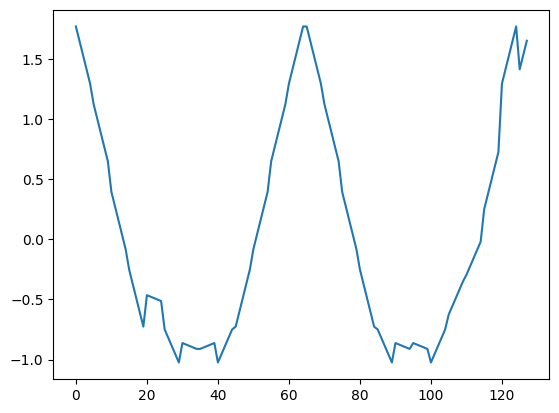

In [6]:
df_one_d_sax_inv = one_d_sax.inv_transform(df_norm, df_one_d_sax, paa.window_size, symbol_mapping_avg, symbol_mapping_slope)
df_one_d_sax_inv.iloc[:,0].plot()

In [7]:
df_one_d_sax_inv.iloc[:10,0]

0    1.771785
1    1.652953
2    1.534121
3    1.415288
4    1.296456
5    1.124811
6    1.005979
7    0.887147
8    0.768314
9    0.649482
Name: signal, dtype: object

<AxesSubplot: >

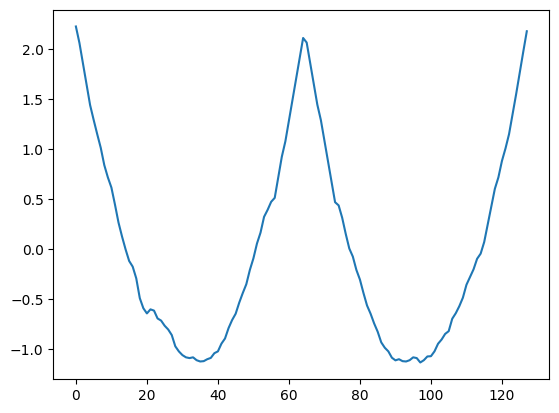

In [8]:
df_norm.iloc[:,0].plot()

In [9]:
df_slope = compute_slopes(df_norm, paa.window_size)
df_slope

,signal,signal
0,-0.198707,-0.157524
1,-0.146077,-0.130598
2,-0.155872,-0.06575
3,-0.126048,-0.03026
4,-0.023428,-0.034036
5,-0.068151,-0.061293
6,-0.010206,-0.149139
7,0.019809,-0.092751
8,0.07812,0.133041
9,0.106079,0.170212


<AxesSubplot: >

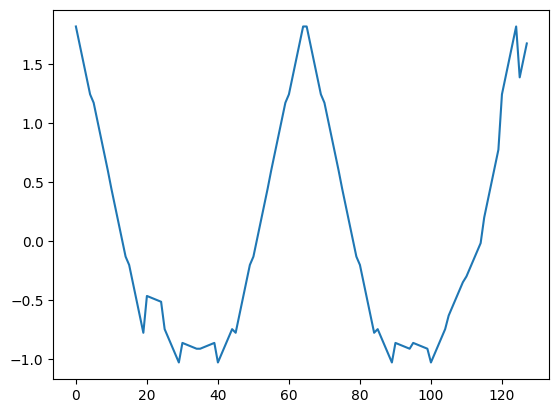

In [10]:
lower_bound = df_slope.to_numpy().min()
symbol_mapping_slope = IntervalMean(lower_bound)
df_one_d_sax_inv = one_d_sax.inv_transform(df_norm, df_one_d_sax, paa.window_size, symbol_mapping_avg, symbol_mapping_slope)
df_one_d_sax_inv.iloc[:,0].plot()

In [11]:
symbol_mapping_slope = MeanValuePoints(df_slope)
df_one_d_sax_inv = one_d_sax.inv_transform(df_norm, df_one_d_sax, paa.window_size, symbol_mapping_avg, symbol_mapping_slope)
df_one_d_sax_inv.iloc[:,0].plot()

c:\users\danie\documents\karlsruhe\03_kit_studium\07_semester\bachelorarbeit\bachelorarbeit\repo\implementation\1_code\src\discretization\sax\one_d_sax.py:203: UserWarning: Make sure you used the segment slopes for initializing the chosen 'symbol_mapping_slope' strategy. Otherwise, the results might not be meaningful.
  warnings.warn("Make sure you used the segment slopes for "


AssertionError: There is a breakpoint interval that does not contain any time series point. Adapt to use less intervals.

In [ ]:
symbol_mapping_slope = MedianValuePoints(df_slope)
df_one_d_sax_inv = one_d_sax.inv_transform(df_norm, df_one_d_sax, paa.window_size, symbol_mapping_avg, symbol_mapping_slope)
df_one_d_sax_inv.iloc[:,0].plot()